In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
def FreeFall_war(state , time):

    g0 = state[1]
    g1 = (-9.8)-b*(state[1]**2)*sign(state[1])
    return array([g0, g1])

In [3]:
def euler(y, t, dt, derivs):
   
    y_next = y + derivs(y,t) * dt 
    return y_next

In [7]:
def rk2 (y , time , dt , derivs ) :

    k0 = dt*derivs(y , time )
    k1 = dt*derivs( y + k0 , time + dt )
    ynext = y + 0.5*( k0 + k1 )
    return ynext

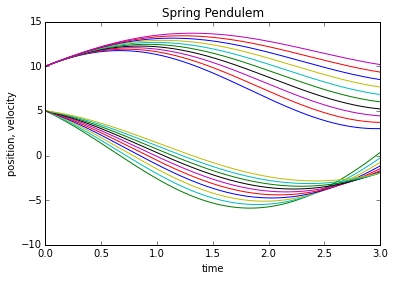

In [14]:
# Use rk2 to calculate position in free fall
S = 10
i = 0
N = 1000
b = .5
xo = 10.0
vo = 5
tau = 3.0
dt = tau/float(N-1)

# number of steps to take 
# initial position
# initial velocity
# total time for the simulation , in seconds. 
# time step

# Since we’re plotting vs t , we need time for that plot.

time = linspace(0, tau, N)
btest = [.000001,.00001,.0001,.001,.01,.1,1,10,100,1000]

y = zeros([S,N,4]) # the state vector
y[:,0,0] = xo
y[:,0,1] = vo

# Now we do the calculations.
# Loop only to N-1 so that we don’t run into a problem addressing y[N+1] 
# on the last point.

for i in range (S):
    m = m +.1
    for j in range(N-1):
    
    # We give the euler routine the current state y[j], the time 
    # (which we don’t care about at all in this ODE) the time step dt, and 
    # the derivatives function FreeFall().
        y[i,j+1] = rk2(y[i,j], time[j], dt, SpringP)

# That’s it for calculations! Now graph the results .
# start by pulling out what we need from y.
for i in range (S):
    xdata = [y[j,:,0] for j in range(S)] 
    vdata = [y[j,:,1] for j in range(S)]
    plot(time, xdata[i], label="position")
    plot(time, vdata[i], label="velocity")
    title('Spring Pendulem')
    xlabel ("time")
    ylabel("position, velocity")

#xlim((0,1.5))
#ylim((0,60.0))

In [16]:
linspace?

In [9]:
type(b)

int

In [11]:
y=zeros(4)
g=zeros(4)

Lo=1.0
k=3.5
m=0.2
theta=0.3
L=1.0
V_L=0.0
V_theta=0.0
gr=9.8

y[0]=L
y[1]=V_L
y[2]=theta
y[3]=V_theta


def SpringP(y,time):
    g[0]=y[1]
    g[1]=(Lo+y[0])*y[3]**2-(k/m)*y[0]+gr*cos(theta)
    g[2]=y[3]
    g[3]=(-1/(Lo+y[0]))*(gr*sin(theta)+2*y[1]*V_theta)
    return array([g[0],g[1],g[2],g[3]])